# Case de análise de dados
![Mova](https://mova.vc/img/logo_beta.svg)

* Nome: Israel Silva de Souza

**Solicitação:**
Pedimos que faça uma análise de dados e nos envie em um vídeo de até três (3) minutos, pontuando claramente as tecnologias utilizadas.
Pode ser feito uma análise de dados de um trabalho pessoal ou de mercado, como a Bolsa de Valores, por exemplo.

**Dataset:** [IBGE PeNSE - 2015](https://www.ibge.gov.br/estatisticas/downloads-estatisticas.html?caminho=pense/2015/microdados/)

**Pesquisa Nacional de Saúde Escolar - PeNSE**. Investiga informações que permitem conhecer e dimensionar os fatores de risco e proteção à saúde dos adolescentes. A pesquisa é realizada por amostragem, utilizando como referência para seleção o cadastro das escolas públicas e privadas do Instituto Nacional de Estudos e Pesquisas Educacionais Anísio Teixeira - INEP.  

A pesquisa foi direciona a escolares com idade de 13 a 17 anos de idade e escolares frequentando as etapas do sexto ano à terceira séria do ensino médio.

**Proposta:** Comparação indice de massa corporal (IMC) com o nível de satisfação declarado do aluno, nas classe de sexo masculino e feminino.



## Leitura dos dados

In [125]:
import pandas as pd
import seaborn as sns
import numpy as np

# Dataset ficou hospedado numa conta do google drive por causa do tamanho de 38MB
caminho = '/content/drive/MyDrive/PeNSE_2015_AMOSTRA2.zip'
# Descompactando o arquivo
zip = ZipFile(caminho)
# caminho do arquivo descompactado
path_unzip = zip.namelist()[1]
# Lendo o arquivo e criando um dataframe pandas
dados = pd.read_csv(zip.open(path_unzip), sep = ";", thousands="." , decimal=",")

In [137]:
print(zip.namelist()[1])

arquivos csv/PENSE_AMOSTRA2_ALUNO.CSV


## Análise do dataframe

* 16556 instâncias.
* 181 atributos com dados do tipo float e int.
* Não observados atributos NaN

In [126]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16556 entries, 0 to 16555
Columns: 181 entries, ANOPESQ to turma
dtypes: float64(10), int64(171)
memory usage: 22.9 MB


In [127]:
dados.head()

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB11005,VB11006,VB11007,VB12001,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
0,2015,76,1,1,2,1,13,7,7,1,2,7,3,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,5,1,8,3,4,3,6,6,1,6,1,-1,2,...,2,1,2,1,1,4,2,-1,3,1,1,-1,1,1,2,2,1,2,2,2,2,2,2,2,371.0,1570.0,37.1,157.0,2,1,1223,1,299.735235,1,2,4,1,1,1,296
1,2015,76,1,1,2,1,14,4,7,1,1,7,3,2,-1,1,1,1,1,1,2,2,2,4,1,2,2,5,3,8,2,1,8,8,6,1,1,5,-1,2,...,2,3,2,4,4,4,1,2,3,3,1,-1,1,1,2,2,2,2,2,1,2,2,2,2,502.0,1520.0,50.2,152.0,2,2,1223,1,355.170081,1,2,4,1,2,1,296
2,2015,76,1,1,1,4,13,6,7,1,1,5,5,2,-1,2,1,1,1,1,2,3,1,4,1,2,2,5,3,2,3,1,8,2,8,1,1,5,5,1,...,2,1,2,1,2,3,1,2,1,2,5,99,1,-1,2,2,1,1,1,1,1,1,1,1,482.0,1614.0,48.2,161.4,2,2,1223,1,299.735235,1,2,4,1,3,1,296
3,2015,76,1,1,1,1,14,6,7,1,1,7,4,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,6,3,2,4,1,3,2,7,1,5,1,-1,2,...,2,1,2,2,2,4,1,10,3,1,2,-1,1,-1,2,2,1,2,2,2,1,2,2,2,694.0,1725.0,69.4,172.5,2,3,1223,1,355.170081,1,2,4,1,4,1,296
4,2015,76,1,1,1,1,13,9,7,1,2,5,4,2,-1,2,1,1,1,1,2,5,1,4,1,2,2,6,5,6,3,5,2,6,2,1,5,1,5,1,...,2,1,4,2,2,4,1,3,2,2,2,13,1,-1,1,2,1,1,1,1,1,1,1,1,789.0,1675.0,78.9,167.5,2,4,1223,1,299.735235,1,2,4,1,5,1,296


Coluna VB01001 é relativa ao sexo do aluno

Coluna VB11007 é marcação de grau de saatisfação com o corpo
1. Muito satisfeito,
2.Satisfeito,
3.Indiferente,
4.Insatisfeito,
5.Muito insatisfeito,
99.Não informado

Coluna VB17003 registro do peso.

Coluna VB17004 registro da altura.

## Análise dos dados

###Classe Sexo

Sexo       Percentual
Masculino   50.054361
Feminino    49.945639


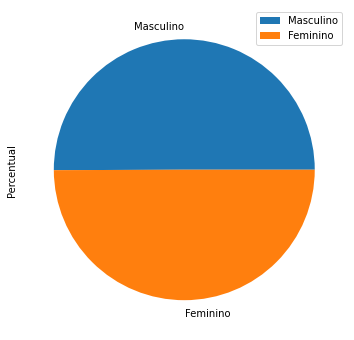

In [128]:
percent_sexo = dados["VB01001"].value_counts(normalize="true") * 100

Leg_VB01001 = {1:"Masculino", 2:"Feminino"}

df_sexo = pd.DataFrame({"Percentual":percent_sexo})

df_sexo.rename(index = Leg_VB01001, inplace = True)
df_sexo.rename_axis("Sexo", axis=1, inplace = True)

df_sexo.plot.pie(subplots=True, figsize=(6,6))

print(df_sexo)


* Amostra balanceada com uma diferença de 0,5%.

###Classe de Satisfação

In [129]:
freq_satisf_corpo = dados["VB11007"].value_counts()
percent_satisf_corpo = dados["VB11007"].value_counts(normalize="true") * 100
percent_satisf_corpo

Leg_VB11007 = {
      1:"Muito satisfeito",
      2:"Satisfeito",
      3:"Indiferente",
      4:"Insatisfeito",
      5:"Muito insatisfeito",
      99:"Não informado"
}

df_dist_freq = pd.DataFrame({"Frequencia":freq_satisf_corpo, "Percentual":percent_satisf_corpo})

df_dist_freq.rename(index = Leg_VB11007, inplace = True)
df_dist_freq.rename_axis("Satisfação em relação ao seu corpo", axis=1, inplace = True)
df_dist_freq

Satisfação em relação ao seu corpo,Frequencia,Percentual
Satisfeito,6920,41.797536
Muito satisfeito,4608,27.832810
Insatisfeito,2326,14.049287
Indiferente,1807,10.914472
Muito insatisfeito,714,4.312636
Não informado,181,1.093259


* Observamos que a maior parte dos alunos está satisfeito com em relação com seu corpo.
* O grupo de insatisfeitos representa menos de 20% do total.

Abaixo, dividimos a amostra pelo sexo, apresentado da tabela e no gráfico.


In [130]:
cross_classe_satisf = pd.crosstab(dados["VB11007"], dados["VB01001"],  normalize = True) * 100
cross_classe_satisf.rename(index = Leg_VB11007, columns=Leg_VB01001, inplace = True)
cross_classe_satisf


VB01001,Masculino,Feminino
VB11007,,
Muito satisfeito,16.199565,11.633245
Satisfeito,21.079971,20.717565
Indiferente,5.738101,5.176371
Insatisfeito,4.747524,9.301764
Muito insatisfeito,1.570428,2.742208
Não informado,0.718773,0.374487


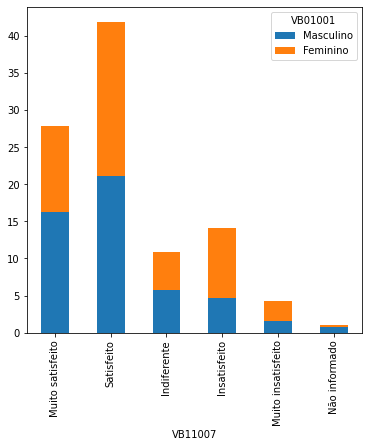

In [131]:
cross_classe_satisf.plot.bar(stacked=True, figsize=(6,6))


* Observamos que entre os grupos de satisfação, a classe masculina é mais satisfeita e menos insafisfeita que a classe feminina.

**Para uma análise mais detalhada, deduziremos a amostra ao grupo que demonstrou-se insatisfeito ou muito insatisfeito.**

In [132]:
dados = dados[(dados['VB11007']==4) | (dados['VB11007'] == 5)]

###Classe IMC

Cálculo Indice Massa Corporal - IMC

O indice de massa corporal é dados pela razão entre o PESO pela ALTURA ao quadrado. A coluna com dados de PESO é a VB17003 de ALTURA é a VB17004.
Acrescentei ao dataframe, uma coluna com o IMC já calculado. Mais detalhes sobre IMC e sua verificação neste [link](https://pt.wikipedia.org/wiki/%C3%8Dndice_de_massa_corporal#:~:text=8%20Refer%C3%AAncias-,Como%20calcular,e%20a%20altura%20em%20metros.).

Após o cálculo, foi feita uma comparação e atribuição de legendas, utilizando a seguinte tabela de atribuição:

|Resultado|Situação|
|--------------|---------------------|
|Abaixo de 17	|Muito abaixo do peso|
|Entre 17 e 18,49	|Abaixo do peso|
|Entre 18,50 e 24,99	|Peso normal|
|Entre 25 e 29,99	|Acima do peso|
|Entre 30 e 34,99	|Obesidade I|
|Entre 35 e 39,99	|Obesidade II (severa)|
|Acima de 40	|Obesidade III (mórbida)|

**Lembrando que neste ponto, o cálculo do IMC foi feito somente para o grupo que apresentou insatisfação com o corpo.**

In [133]:
# Cálculo IMC
dados["IMC"] = dados["VB17003"]/((dados["VB17004"]/100)**2)
# Range para legendas
resultado = [0,18.5,30,70]
legendas = ["Abaixo do peso", "Peso normal", "Obesidade"]
# Incremento no dataframe da coluna CLASSE_IMC
dados["CLASSE_IMC"] = pd.cut(x = dados["IMC"],
       bins = resultado,
       labels = legendas,
       include_lowest = True)
# Frequencia e percentuais da CLASSE_IMC
freq_classe_imc = dados["CLASSE_IMC"].value_counts()
perc_classe_imc = dados["CLASSE_IMC"].value_counts(normalize="true") * 100

dist_freq_imc = pd.DataFrame({"Frequencia":freq_classe_imc, "Percentual":perc_classe_imc})
dist_freq_imc.rename_axis("Classe IMC", axis=1, inplace = True)

dist_freq_imc

Classe IMC,Frequencia,Percentual
Peso normal,2134,70.197368
Abaixo do peso,622,20.460526
Obesidade,284,9.342105


* Observamos que, dos 18,36% declarados insatisfeitos, aproximadamente 70% está no peso normal. Dos outros 30, dois terços está abaixo do peso e os demais na faixa da obesidade. Esse percentual insatisfeito e fora do IMC considerado normal, representa 5,5% do total da amostra.

* Interessante uma análise cruzada com a faixa de renda para identificar o grupo o comportamento do grupo abaixo do peso.



* Observamos no gráfico abaixo que o box apresenta uma distribuição simétrica com vários outliers a direita, para valores de IMC maiores que 30.



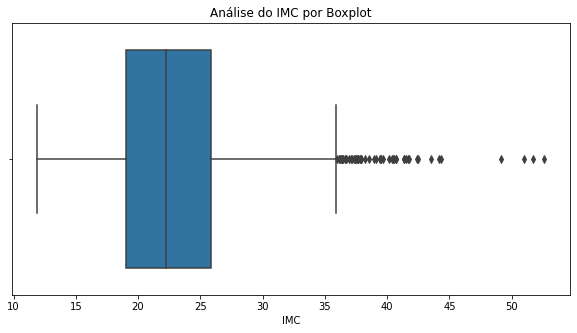

In [134]:
bp = sns.boxplot(x = "IMC", data = dados)
bp.figure.set_size_inches(10, 5)
bp.set_title("Análise do IMC por Boxplot")
bp.set_xlabel("IMC")
bp;


**Reduziremos a amostra aos 30% de insatisfeitos fora do IMC normal para uma análise segmentada por sexo.**

* Na segmentação abaixo, fica observamos que três quintos do grupo de insatisfeitos estão na classe feminina.
* A razão de insatisfeitos por estar abaixo do peso é de dois terço em relação aos obesos.

In [135]:
dados = dados[(dados['CLASSE_IMC']=='Abaixo do peso') | (dados['CLASSE_IMC'] == 'Obesidade')]
dados['VB11007']

cross_classe_sexo = pd.crosstab(dados["VB01001"], dados["CLASSE_IMC"], normalize = True) * 100
cross_classe_sexo.rename(index = Leg_VB01001, columns=Leg_VB11007, inplace = True)
cross_classe_sexo['Total'] = cross_classe_sexo.sum(axis=1)
cross_classe_sexo

CLASSE_IMC,Abaixo do peso,Obesidade,Total
VB01001,,,
Masculino,25.717439,12.141280,37.85872
Feminino,42.935982,19.205298,62.14128


In [136]:
cross_classe_satisf = pd.crosstab(dados["VB11007"], dados["CLASSE_IMC"],  normalize = True) * 100
cross_classe_satisf.rename(index = Leg_VB11007,  inplace = True)

cross_classe_satisf

CLASSE_IMC,Abaixo do peso,Obesidade
VB11007,,
Insatisfeito,49.889625,21.743929
Muito insatisfeito,18.763797,9.602649


## Conclusões



* Concluímos que, mais de 80% dos nossos alunos, declaram estar satisfeitos com seu corpo, não opinaram ou são indiferentes a este assunto. 

* Analisando mais de perto os que declaram insatisfação, apenas 29,8% apresentaram problemas com peso (5,5% do total), estando abaixo ou acima do seu peso. O IMC pode não ser a causa exata, mas é um parâmetro que ajuda a apontar outros problemas sociais como desnutrição, renda, ansiedade, saúde entre outros.

* Deste 5,5% da amostra total, que declara insatisfação e sinalizam probelams com peso, 62% é do público feminino, dividindo a amostra em 3,5% de meninas e 2% de meninos aproximadamente.

* Temos mais jovem insatisfeitos com o corpo por estarem abaixo do peso so que por serem obesos e a maioria são meninas.

* Pode parecer pouco, mas em 2020 foram 47,3 milhões de matrículas realizadas nas escolas público e privadas do país. Isso dá mais de 2,5 milhões de alunos que enfrentam dificuldades de auto-estima por se sentirem insatisfeitos com padrões corporais. 
